# CODSOFT TASK 3

## AHMED ALI

### SALES PREDICTION


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# IPORTING DATASET AND PERFORMING DATA ANALYSIS

In [2]:
dataset = pd.read_csv('advertising.csv')

In [3]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# DATA VISUALISATION

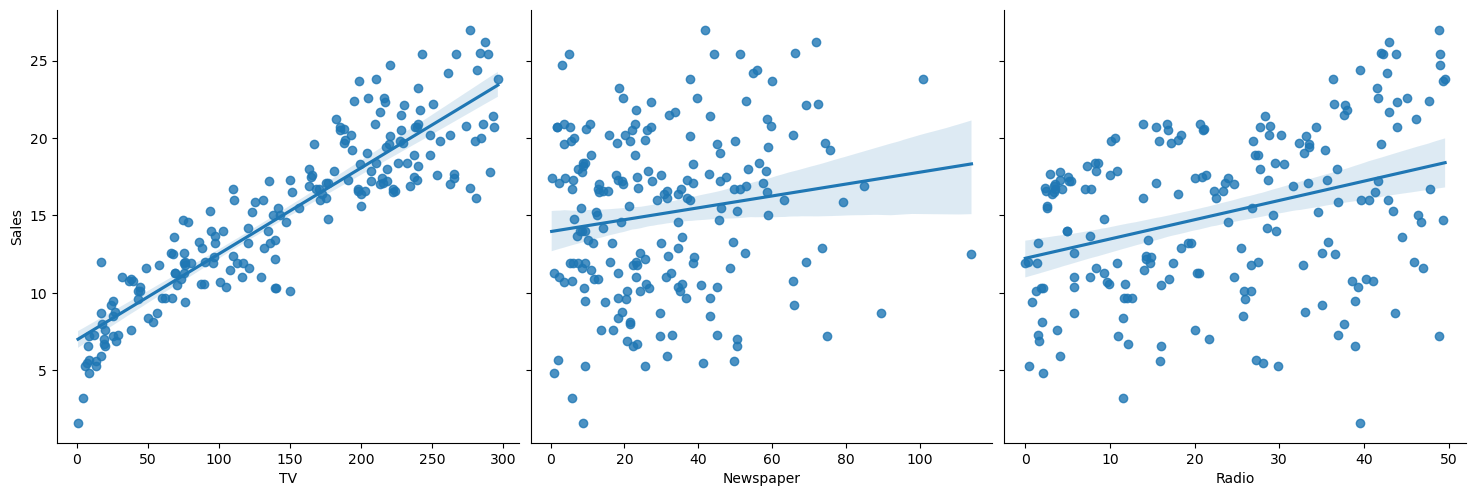

In [7]:
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

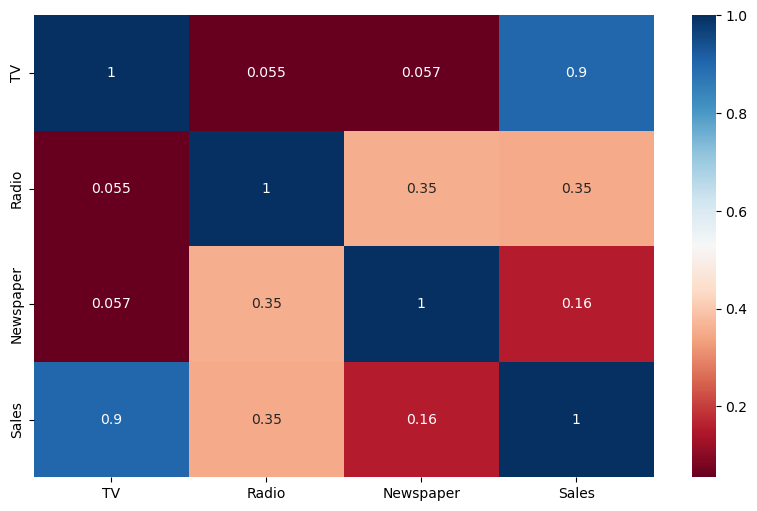

In [8]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), cmap="RdBu",annot = True)
plt.show()

## MODEL TRAINING AND PREDICTION AFTER RESULT FROM CORRELATING HEATMAP

In [9]:
# Since TV-Sales relation is strongest in heatmap therefore,
X = dataset['TV']
Y = dataset['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)


In [10]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [11]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [12]:
model = LinearRegression()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

In [14]:
MSE

4.077556371826949

In [15]:
R2

0.7921031601245662

In [16]:
MAE

1.6480589869746527

In [17]:
print("Mean Squared Error :", MSE)
print("Mean Absolute Error:", MAE)
print("R squared:", R2)

Mean Squared Error : 4.077556371826949
Mean Absolute Error: 1.6480589869746527
R squared: 0.7921031601245662


In [18]:
inputt = pd.DataFrame({
    'TV': [151.5],         
})

# Make predictions on the input data
predictions = model.predict(inputt)
print("Predicted Sales:", predictions[0])

Predicted Sales: 15.212364766761413


C:\Users\sh4dow\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
